In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('04_02/poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
vote    1000 non-null object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [7]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [8]:
# Sampling variability
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown', 'Green')})

In [9]:
s = sample(0.51, n=1000)

In [10]:
s.vote.value_counts(normalize=True)

Brown    0.509
Green    0.491
Name: vote, dtype: float64

In [13]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [14]:
dist.head()

,Brown,Green
vote,0.525,0.475
vote,0.496,0.504
vote,0.530,0.470
vote,0.507,0.493
vote,0.506,0.494


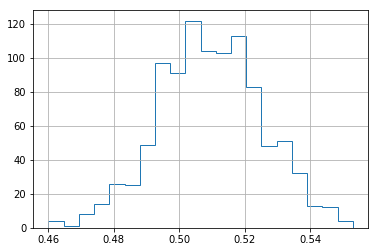

In [16]:
dist.Brown.hist(histtype='step', bins=20)

In [17]:
# Confidence interval describes the uncertainty of inference similiar to
# weight

In [19]:
def samplingdist(brown, n=1000):
    return pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [20]:
def quantitles(brown, n=1000):
    dist = samplingdist(brown, n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [ ]:
# Let's say we want to go for the 95% confidence interval. 
# This will lie between the 2.5% quantile and the 97.5% quantile.

In [21]:
quantitles(0.50)

(0.481, 0.543)

In [23]:
quantitles(0.48)

(0.481, 0.540025)

In [24]:
quantitles(0.54)

(0.481, 0.541)

In [26]:
# Another way to explain this is confidence interval

# 95% confidence interval: [0.48, 0.54]

# Estimate = 0.51 ± 0.03 (at 95% confidence)

# 0.51 = Point estimate
# 0.03 = Margin of error

In [41]:
dist = samplingdist(0.50, 10000)

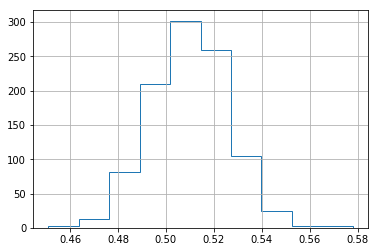

In [42]:
dist.Brown.hist(histtype='step')

In [35]:
largepoll = pd.read_csv('04_02/poll-larger.csv')

In [36]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64